In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import tkinter
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold
from statistics import mean
from statistics import stdev as std
import statsmodels.formula.api as sm
pd.set_option("display.max_columns", None)
import statsmodels.api as sm
import matplotlib
import warnings
import statistics
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
%matplotlib inline

def merge_fix_cols(df_company,df_product,uniqueID):## merge 2 dataframes and remove the duplicate ## 

    df_merged = pd.merge(df_company,
                         df_product,
                         how='left',on=uniqueID)    
    for col in df_merged:
        if col.endswith('_x'):
            df_merged.rename(columns = lambda col:col.rstrip('_x'),inplace=True)
        elif col.endswith('_y'):
            to_drop = [col for col in df_merged if col.endswith('_y')]
            df_merged.drop(to_drop,axis=1,inplace=True)
        else:
            pass
    return df_merged

def dfmaker (x):
    y = x.items()
    y = list(y)
    df = pd. DataFrame(y) 
    return df

In [2]:
dataset = pd.read_csv("dataset.csv") ## read the csv file ## 
dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Data analysis & EDA #

In [3]:
dataset.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
dataset.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# unbalanced data on the drug (target value) #

<AxesSubplot:xlabel='Drug', ylabel='count'>

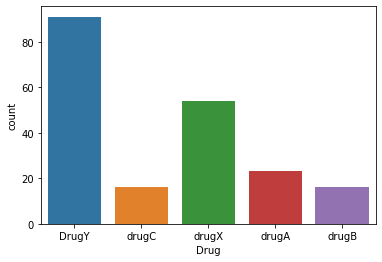

In [5]:
sns.countplot(dataset['Drug'], label = "Count")



<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

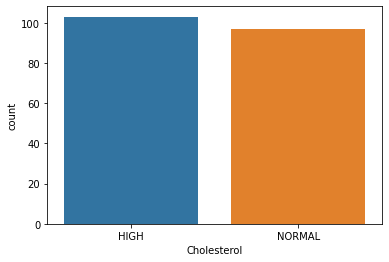

In [6]:
sns.countplot(dataset['Cholesterol'], label = "Count")


<AxesSubplot:xlabel='BP', ylabel='count'>

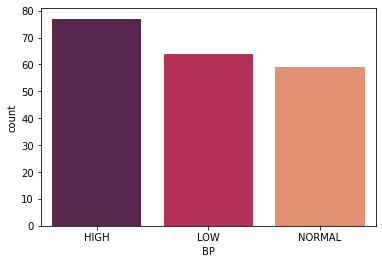

In [7]:
sns.countplot(dataset['BP'], label = "Count",palette="rocket")


<AxesSubplot:xlabel='Sex', ylabel='count'>

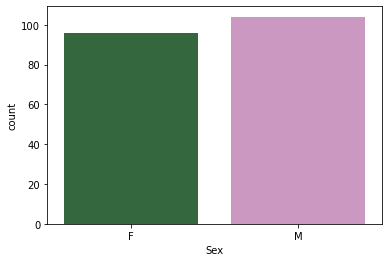

In [8]:
sns.countplot(dataset['Sex'], label = "Count",palette="cubehelix")


<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

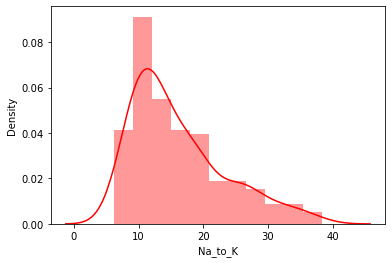

In [9]:
sns.distplot(dataset['Na_to_K'],color='r')

<AxesSubplot:xlabel='Age', ylabel='Density'>

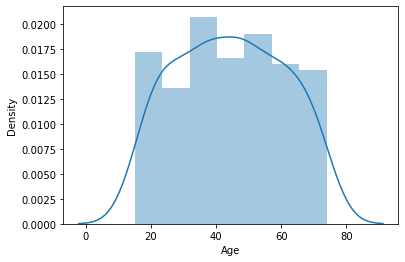

In [10]:
sns.distplot(dataset['Age'])

In [11]:
target_names=dataset['Drug'].unique()
target_names

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<AxesSubplot:>

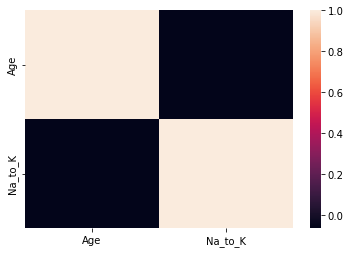

In [12]:
dfn_corr = dataset.corr()## show the corr matrix ##
sns.heatmap(dfn_corr)

# data prep #


1.#### make instead of one-hot encoding an ordinal order for the categorical features #

In [13]:
dataset['Sex']=dataset['Sex'].map({'F':0,'M':1})
dataset['BP']=dataset['BP'].map({'HIGH':0,'LOW':1,'NORMAL':2})
dataset['Cholesterol']=dataset['Cholesterol'].map({'HIGH':0,'NORMAL':1})
dataset['Drug']=dataset['Drug'].map({'drugA':0,'drugB':1,'drugC':2,'drugX':3,'DrugY':4})
dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


# Train test split and scaling the X #

In [14]:
#scaler = StandardScaler()
y = dataset['Drug'] ## take the y postive
x=dataset.drop(columns=["Drug"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = 42,shuffle=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


# make oversampling to balance the Target data ##

0 iteration


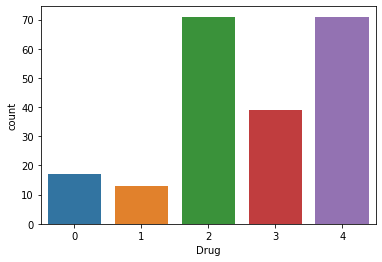

1 iteration


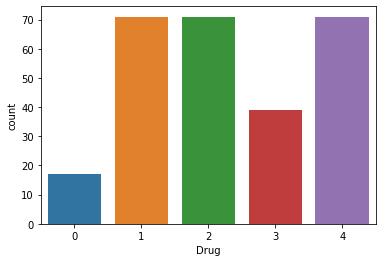

2 iteration


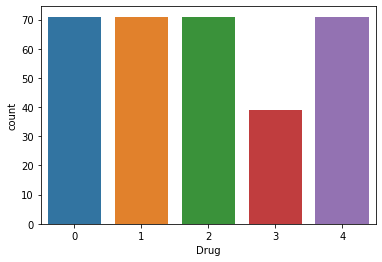

3 iteration


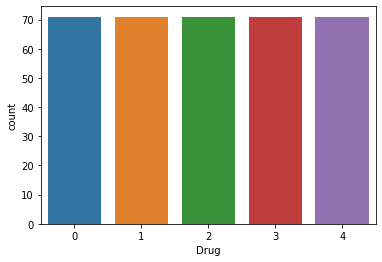

In [16]:
from imblearn.over_sampling import SMOTE
for i in range (0,4):
    smote=SMOTE('minority')
    X_train,y_train=smote.fit_resample(X_train,y_train)
    print(i,"iteration")
    sns.countplot(y_train, label = "Count")
    plt.show()


# KNN classifier ##

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [18]:
#knn#
acc={}
knn = KNeighborsClassifier()

n_neighbors = range(1, 130, 1)
metric = ['manhattan']
param_grid = dict(n_neighbors=n_neighbors,metric=metric)
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1',)
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print("best k",grid.best_params_)

knn_model_p=grid.best_estimator_
knn_model_p.fit(X_train, y_train)
y_pred = knn_model_p.predict(X_test)
acc["knn"]=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=target_names))

best k {'metric': 'manhattan', 'n_neighbors': 1}
              precision    recall  f1-score   support

       DrugY       1.00      0.83      0.91         6
       drugC       0.60      1.00      0.75         3
       drugX       1.00      1.00      1.00         6
       drugA       1.00      0.93      0.97        15
       drugB       0.95      0.95      0.95        20

    accuracy                           0.94        50
   macro avg       0.91      0.94      0.91        50
weighted avg       0.96      0.94      0.94        50



# prep for logistic regression -check for multicolinarity ##

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]


vif_data ## removing age for logistic regression ## 

x_lr=x.drop(columns=['Age'])



## re split to train test after removing age due VIF > 5 ## 

In [20]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(x_lr, y, test_size = 0.25,random_state = 42,shuffle=y)
sc = StandardScaler()
X_train_lr = sc.fit_transform(X_train_lr)
X_test_lr = sc.transform (X_test_lr)

In [21]:
smote=SMOTE()
X_train_lr,y_train_lr=smote.fit_resample(X_train_lr,y_train_lr)

# logistic regression classifier ##

In [22]:
#logistic regression#

logreg = LogisticRegression()

logreg.fit(X_train_lr, y_train_lr)
y_pred = logreg.predict(X_test_lr)
acc["Logistic_regression"]=accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       DrugY       0.50      0.33      0.40         6
       drugC       0.20      0.33      0.25         3
       drugX       1.00      0.83      0.91         6
       drugA       1.00      1.00      1.00        15
       drugB       0.95      1.00      0.98        20

    accuracy                           0.86        50
   macro avg       0.73      0.70      0.71        50
weighted avg       0.87      0.86      0.86        50



# SVM classifier -Linear ,Polynimial, Gaussian##

In [23]:
#svc linear#
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
clf =LinearSVC()
sc =StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc["SVM_linear"]=accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       DrugY       0.86      1.00      0.92         6
       drugC       0.75      1.00      0.86         3
       drugX       1.00      0.83      0.91         6
       drugA       1.00      1.00      1.00        15
       drugB       0.95      0.90      0.92        20

    accuracy                           0.94        50
   macro avg       0.91      0.95      0.92        50
weighted avg       0.95      0.94      0.94        50



In [24]:
#svc poly regression#
avg_scores_f1 = {} ## dict for  f1 mean $
std_scores_f1 = {} ## dict for f1 std  $
f1_scores=[]
dgree = range(1, 6, 1)
param_grid = dict(degree=dgree)
clf=SVC(kernel='poly')
# defining parameter range
grid = GridSearchCV(clf, param_grid, cv=10, scoring='f1',)
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print("best k",grid.best_params_)
acc["SVM_poly"+str(grid.best_params_)]=accuracy_score(y_test, y_pred)

SVCK=grid.best_estimator_
SVCK.fit(X_train, y_train)
y_pred = SVCK.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))


best k {'degree': 1}
              precision    recall  f1-score   support

       DrugY       0.86      1.00      0.92         6
       drugC       0.75      1.00      0.86         3
       drugX       1.00      1.00      1.00         6
       drugA       1.00      1.00      1.00        15
       drugB       1.00      0.90      0.95        20

    accuracy                           0.96        50
   macro avg       0.92      0.98      0.95        50
weighted avg       0.97      0.96      0.96        50



In [25]:
#svc gaussian #
param_grid = dict(C=np.arange(0.01, 7, 0.1))
clf=SVC(kernel='rbf')
# defining parameter range
grid = GridSearchCV(clf, param_grid, cv=10, scoring='f1',)
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print("best C",grid.best_params_)

SVCK=grid.best_estimator_
SVCK.fit(X_train, y_train)
y_pred = SVCK.predict(X_test)
acc["SVM_rbf"+str(grid.best_params_)]=accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=target_names))



best C {'C': 0.01}
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00         6
       drugC       0.33      1.00      0.50         3
       drugX       0.50      0.50      0.50         6
       drugA       1.00      0.80      0.89        15
       drugB       0.94      0.80      0.86        20

    accuracy                           0.80        50
   macro avg       0.75      0.82      0.75        50
weighted avg       0.88      0.80      0.82        50



# Tree based classifiers ##

# Decision Tree  classifier ##

In [26]:
# Create Decision Tree classifer object
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         3
       drugX       0.46      1.00      0.63         6
       drugA       1.00      0.53      0.70        15
       drugB       1.00      1.00      1.00        20

    accuracy                           0.86        50
   macro avg       0.89      0.91      0.87        50
weighted avg       0.94      0.86      0.86        50



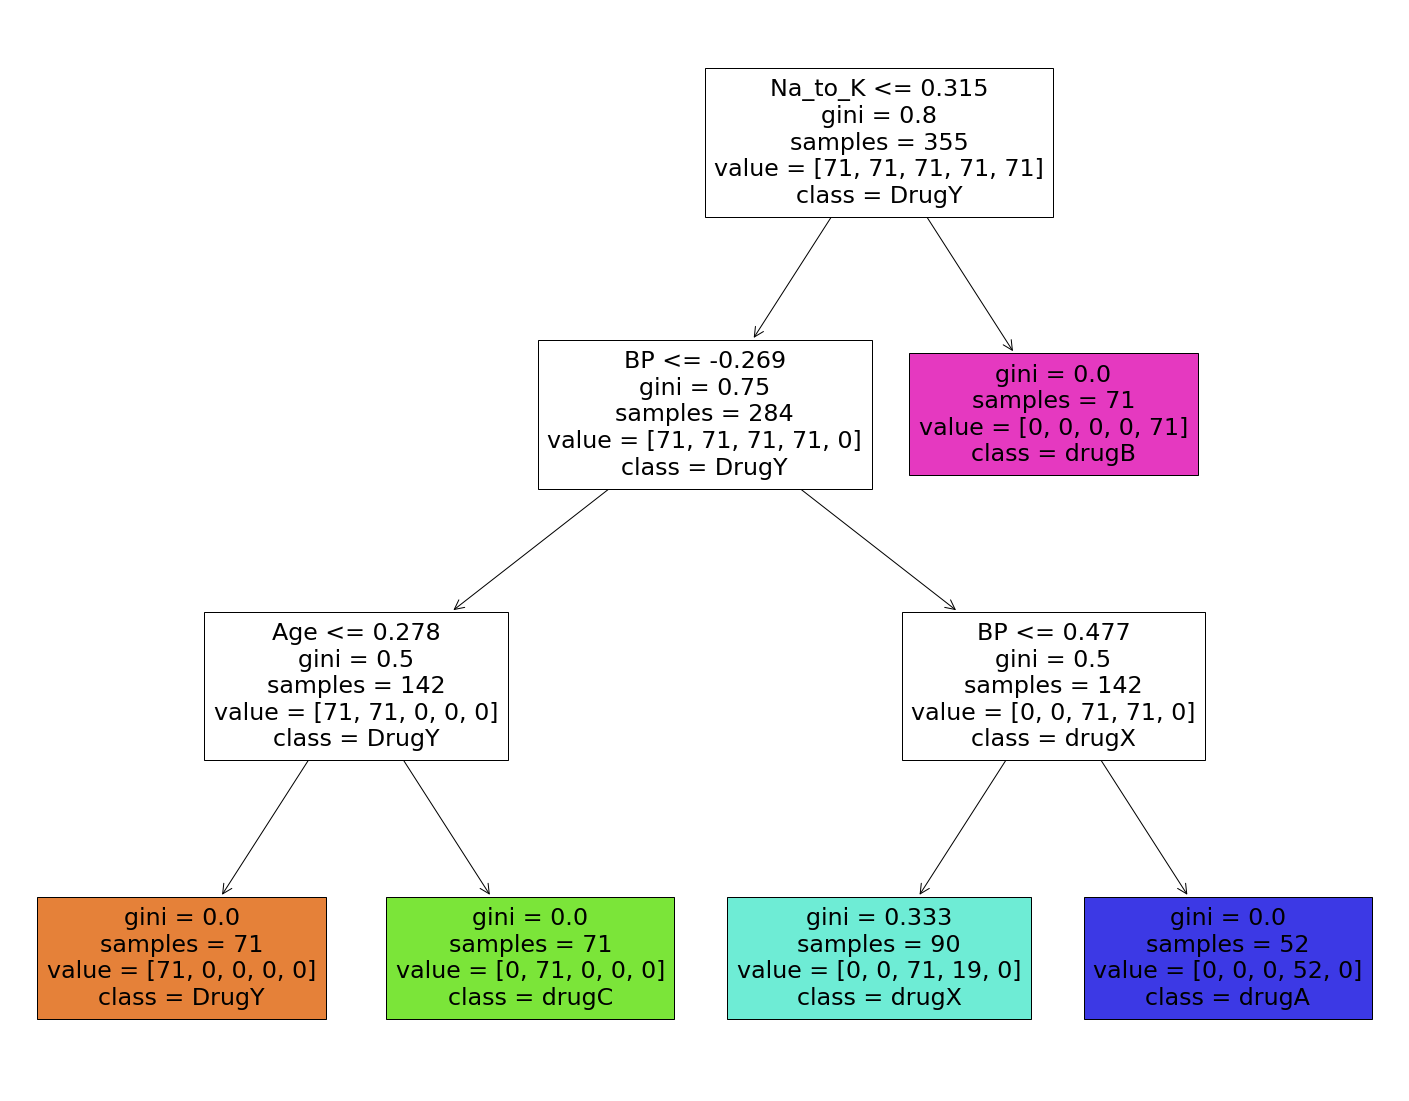

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=x.columns,  
                   class_names=target_names,
                   filled=True)

# Xgboost classifier ##

In [28]:
from xgboost import XGBClassifier
import xgboost as xgb

# params = { 
#     'model__max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
#     'model__learning_rate': [0.001, 0.01, 0.1, 0.20, 0.25, 0.30],
#     "model__gamma":[0, 0.25, 0.5, 0.75,1],
#     'model__n_estimators': [100, 500, 1000], 
# }

# xgbr = xgb.XGBClassifier(seed = 20)

# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='f1',
#                    n_jobs=-1, 
#                    verbose=1)
# clf.fit(X_train, y_train)
# print("Best parameters:", clf.best_params_)

# XGB =clf.best_estimator_
XGB=xgb.XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
acc["Xgboost"]=accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=target_names))


[14:29:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00         6
       drugA       1.00      1.00      1.00        15
       drugB       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score



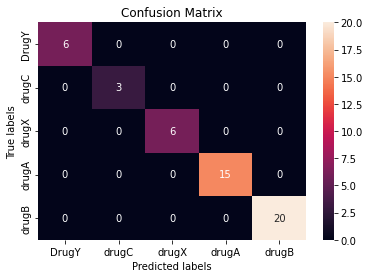

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt     
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

In [31]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RandomForest.fit(X_train, y_train)
y_pred = RandomForest.predict(X_test)
acc["RandomForest"]=accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00         6
       drugA       1.00      1.00      1.00        15
       drugB       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



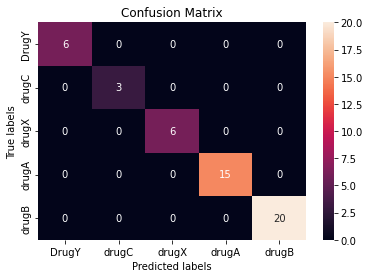

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

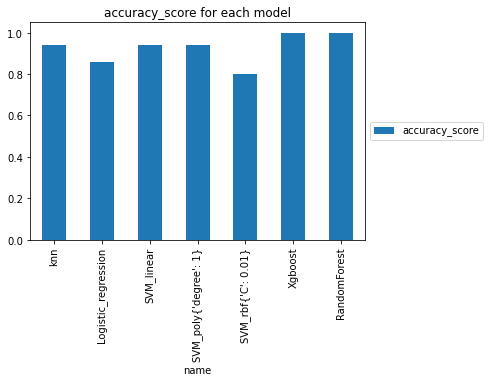

In [33]:
df1 = pd.DataFrame(list(acc.items()), columns=['name', 'accuracy_score'])
df1

df1.plot(x ='name', y=["accuracy_score"], kind = 'bar')

plt.title('accuracy_score Score')## LABELS OF AXSIS ## 
plt.title('accuracy_score for each model')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),prop={"size":10})## THE LEGEND ##
#plt.ylim(0.6, 1,0.01)
plt.rcParams["figure.figsize"] = (8,4)
plt.show()

# picked XGBOOST for the model to run 
# now i will check the Feature importace #

Age  Feature importance: 0.17781277
Sex  Feature importance: 0.0011143491
BP  Feature importance: 0.48583302
Cholesterol  Feature importance: 0.15794165
Na_to_K  Feature importance: 0.17729822


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Sex'),
  Text(2, 0, 'BP'),
  Text(3, 0, 'Cholesterol'),
  Text(4, 0, 'Na_to_K')])

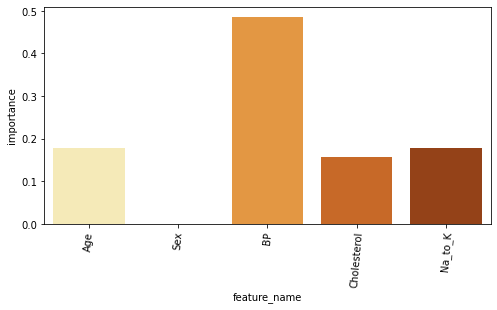

In [34]:
#Feature importace ##
fet_im_2 = {} #dict for prediction r^2#
dfn_2=dataset.drop(columns=["Drug"])

importance = XGB.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
        print((dfn_2.columns[i])," Feature importance: "+str(v))
        fet_im_2[dfn_2.columns[i]]=v

fet_im_2
df_fet_im_2= pd.DataFrame(list(fet_im_2.items()), columns=['feature_name', 'importance'])
# plot feature importance
sns.barplot(x = 'feature_name',
            y = 'importance',
            data = df_fet_im_2,
            palette = "YlOrBr")
plt.xticks(rotation=85)

# Blood presure is the most important feature

### so there is a strong correlation between the blood pressure 
### and the type of drug that the patient is taking